# Get mean frequency (in kHz)

### Idea
1. Get wav voice data -> Visualize voice
2. Cut out the parts without voice -> visualize voice after cut
3. Show in spectrogram

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import pandas as pd
import glob
import IPython.display as ipd

In [2]:
MALE_DATA = "D:\\VoiceClone\\OtherProject\\VoxCeleb_gender\\males"
FEMALE_DATA = "D:\\VoiceClone\\OtherProject\\VoxCeleb_gender\\females"

In [3]:
FIGSIZE=(12, 4)

In [4]:
male_list = glob.glob(MALE_DATA + "\\*.wav")
female_list = glob.glob(FEMALE_DATA + "\\*.wav")

In [5]:
gender_list = []
for item in male_list:
    gender_list.append("male")
for item in female_list:
    gender_list.append("female")

In [6]:
labels = pd.DataFrame(gender_list)

In [7]:
# play the audio file
ipd.Audio(male_list[0])

In [8]:
y_male_test, sr_male_test = librosa.load(male_list[0], res_type='kaiser_fast', duration=3)
# y_male_test, sr_male_test = librosa.load(male_list[0], res_type='kaiser_fast')

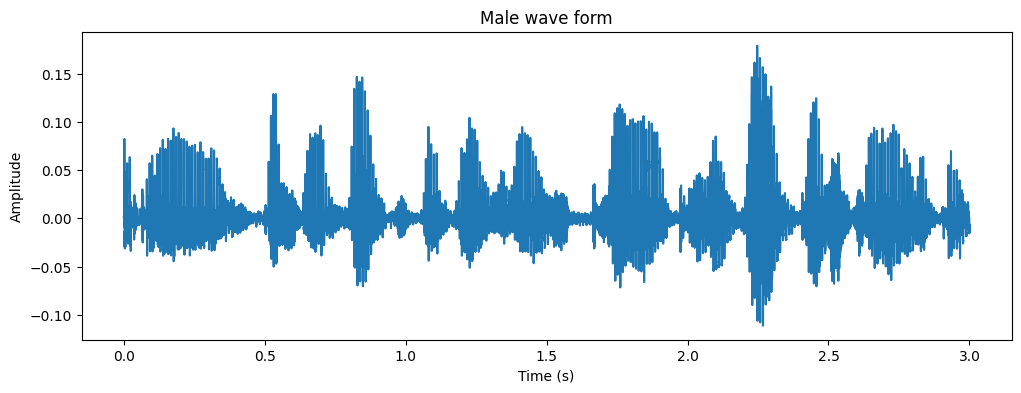

In [9]:
# Visualize male voice
plt.figure(figsize=FIGSIZE)
time = librosa.samples_to_time(np.arange(len(y_male_test)), sr=sr_male_test)
plt.plot(time, y_male_test)
plt.title('Male wave form')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

### If use top_db=10, can see spectrogram to get meanfreq else
### can use top_db=60, then use clustering to get class have voice, use this to get meanfreq

In [10]:
intervals = librosa.effects.split(y_male_test, top_db=10)
intervals

array([[ 1024,  1536],
       [ 2048,  8192],
       [10752, 13312],
       [13824, 16896],
       [17408, 20480],
       [23552, 25088],
       [26112, 33792],
       [37888, 43008],
       [44032, 52224],
       [52736, 56832],
       [57856, 63488],
       [64512, 66048]])

In [11]:
y_male_test[intervals[0][0]:intervals[0][1]]

array([ 4.95855091e-03,  5.57435118e-03,  6.33422146e-03,  7.26373214e-03,
        8.18302017e-03,  9.00588185e-03,  9.73282754e-03,  1.03213545e-02,
        1.06684687e-02,  1.06688030e-02,  1.03330370e-02,  9.74830426e-03,
        8.91925860e-03,  7.82276969e-03,  6.58079842e-03,  5.44456160e-03,
        4.55827359e-03,  3.82272946e-03,  3.16141150e-03,  2.66210572e-03,
        2.20258906e-03,  1.49833050e-03,  6.70269947e-04,  1.02086460e-05,
       -6.23112195e-04, -1.44483650e-03, -2.31663813e-03, -3.12645268e-03,
       -3.92211229e-03, -4.56647761e-03, -4.85011097e-03, -4.88143694e-03,
       -4.95849224e-03, -5.07161207e-03, -4.89544589e-03, -4.40638466e-03,
       -4.01067315e-03, -3.87578132e-03, -3.75780067e-03, -3.50467791e-03,
       -3.17997253e-03, -2.88874982e-03, -2.66449805e-03, -2.35053478e-03,
       -1.91998540e-03, -1.72397937e-03, -1.77851401e-03, -1.54645415e-03,
       -9.52475937e-04, -5.03359188e-04, -3.81542544e-04, -4.54179943e-04,
       -6.73337432e-04, -

In [12]:
len(intervals)
temp = y_male_test[intervals[0][0]:intervals[0][1]]
for i in range(1,len(intervals)):
    temp = np.concatenate((temp, y_male_test[intervals[i][0]:intervals[i][1]]), axis=0)

In [13]:
len(y_male_test)

66150

In [14]:
len(temp)

49152

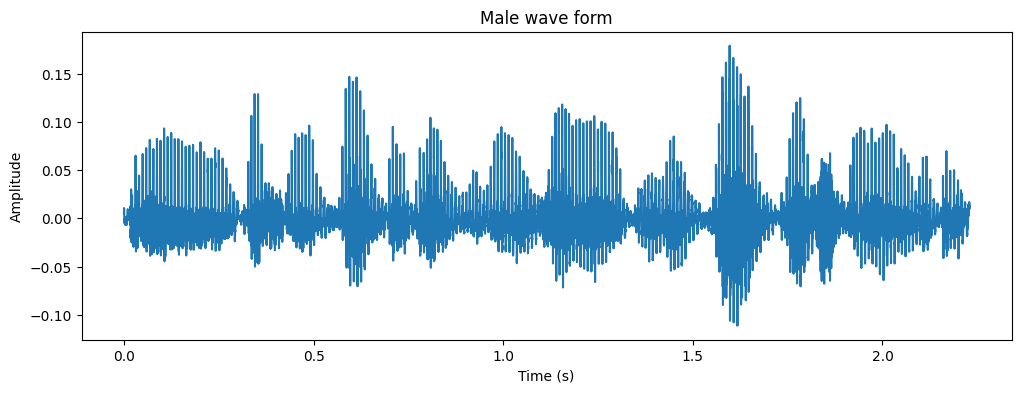

In [15]:
# Visualize male voice after cut
plt.figure(figsize=FIGSIZE)
time = librosa.samples_to_time(np.arange(len(temp)), sr=sr_male_test)
plt.plot(time, temp)
plt.title('Male wave form')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

2048
4.5351473922902495e-05


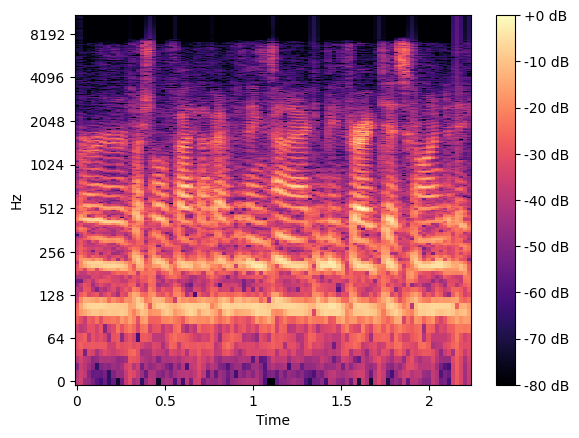

In [16]:
# Visualize spectrogram
S = librosa.stft(temp)
D = librosa.amplitude_to_db(np.abs(S), ref=np.max)
# D = librosa.amplitude_to_db(np.abs(librosa.stft(temp)),ref=1.0, amin=1e-05, top_db=80.0)
librosa.display.specshow(D, y_axis='log', sr=sr_male_test,
                         x_axis='time')
# add color
plt.colorbar(format='%+2.0f dB')

In [17]:
cent = librosa.feature.spectral_centroid(y=temp, sr=sr_male_test)

2048
4.5351473922902495e-05


In [18]:
# GET f0
f0, voiced_flag, voiced_probs = librosa.pyin(temp, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))

In [43]:
x = f0.dropna()
f0

0            NaN
1            NaN
2     108.736542
3     106.868514
4     105.641024
         ...    
92    105.032576
93    103.228180
94     99.137551
95     97.998859
96     95.760562
Length: 97, dtype: float64

In [24]:
f0 = pd.Series(f0)
mean_value = f0.mean()
f0_fill = f0.fillna(mean_value)
f0_std_dev = np.std(f0_fill)

In [35]:
mean_value

104.645426722695

In [38]:
q1 = np.quantile(f0.dropna(), 0.25)
q1

102.04250286354403

In [45]:
q3 =np.quantile(f0.dropna(), 0.75)
q3

106.86851352689665

In [47]:
iqr = q3-q1
iqr

4.826010663352619

2048
4.5351473922902495e-05


[Text(0.5, 1.0, 'log Power spectrogram')]

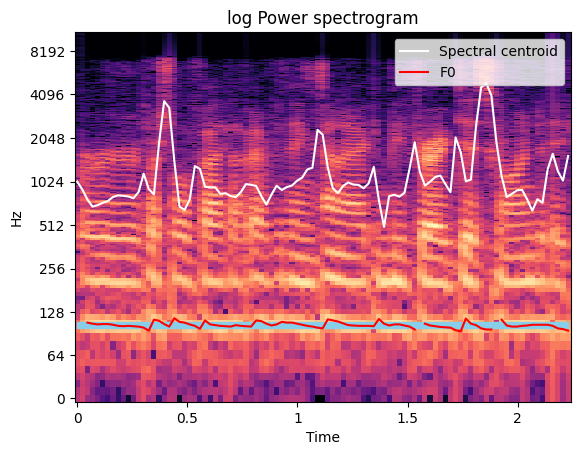

In [49]:
S, phase = librosa.magphase(librosa.stft(y=temp))
times = librosa.times_like(cent)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent.T, label='Spectral centroid', color='w')
ax.fill_between(times, mean_value-f0_std_dev, mean_value+f0_std_dev, color='skyblue')
ax.plot(times, f0, label='F0', color='r')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

In [20]:
len(cent[0])

97

In [21]:
cent

array([[1023.32505601,  902.34348311,  768.94807972,  687.65215344,
         704.06531244,  730.26501427,  752.58874895,  800.78510941,
         822.90753809,  815.99700869,  807.87121159,  786.09213417,
         866.28127774, 1161.30141533,  908.87940941,  834.54934981,
        1878.20299314, 3680.55839973, 3311.06129271, 1415.52421114,
         687.9697247 ,  653.17141667,  769.90100766, 1310.50503778,
        1253.22547434,  943.3996397 ,  933.30283668,  934.73161034,
         841.30383172,  851.43147566,  813.52886834,  799.41127822,
         865.78629788,  984.60015114,  972.29878174,  956.1167444 ,
         812.47577123,  710.6014995 ,  833.60625842,  958.55529457,
         895.54139866,  938.43278757,  961.87290375, 1037.82806746,
        1090.78174584, 1241.84078572, 1277.56559148, 2329.68854904,
        2159.89570416, 1284.42947794,  920.01343371,  854.0154352 ,
         955.39440388, 1010.48242654,  976.53399879,  970.90205791,
         920.78821384,  995.21943024, 1294.61610

In [22]:
# Get f0
f0, voiced_flag, voiced_probs = librosa.pyin(temp, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))

In [23]:
f0

array([         nan,          nan, 108.73654224, 106.86851353,
       105.64102396, 106.25299618, 106.25299618, 105.03257643,
       103.22817963, 102.63362907, 103.22817963, 102.63362907,
       102.04250286, 100.28947374,  95.76056196, 113.87914162,
       111.92276613, 106.25299618, 102.04250286, 116.54094038,
       110.        , 108.73654224, 105.64102396, 103.22817963,
        98.56656061, 112.57112812, 105.64102396, 104.4276333 ,
       103.22817963, 102.63362907, 102.04250286, 104.4276333 ,
       103.22817963, 102.63362907, 102.04250286, 112.57112812,
       111.27813843, 106.86851353, 103.82617439, 105.64102396,
       110.        , 108.73654224, 108.73654224, 106.86851353,
       105.03257643, 103.22817963, 102.04250286, 100.28947374,
        99.13755089, 114.53883678, 112.57112812, 110.63722352,
       107.48759653, 104.4276333 , 103.82617439, 103.22817963,
       103.22817963, 103.22817963, 102.63362907, 115.20235351,
       106.86851353, 103.82617439, 105.64102396, 105.64